# 20180110 - My Neural Network Lab notes - MNIST dataset

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

np.random.seed(666)

Using TensorFlow backend.


## Data
Keras include sample datasets, e.g. MNIST database of handwritten digits

http://yann.lecun.com/exdb/mnist/

Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

Usage:

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Returns:

2 tuples:

x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).

y_train, y_test: uint8 array of digit labels (integers in range 0-9) with shape (num_samples,).

Arguments:

path: if you do not have the index file locally (at '~/.keras/datasets/' + path), it will be downloaded to this location.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('\nLength of data vector')
print(len(x_train))


Length of data vector
60000


## Data visualization

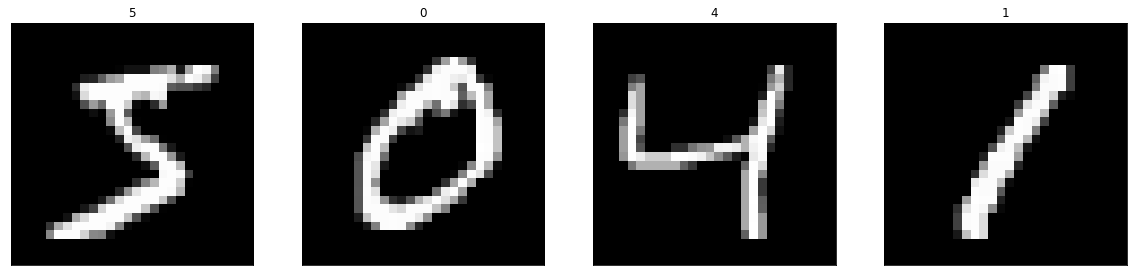

In [3]:
fig = plt.figure(figsize=(20,20))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

## Data normalization

Converting [0,255] --> [0,1]

In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255 

## One-hot encoding

In [5]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print(y_train[:4])

[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


## Model

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

input_shape=x_train.shape[1:]
print(input_shape)

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

(28, 28)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 26,506.0
Trainable params: 26,506.0
Non-trainable params: 0.0
_________________________________________________________________


## Compile & train

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

hist = model.fit(x_train, y_train, batch_size=64, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 2s - loss: 0.7416 - acc: 0.7648     
Epoch 2/10
60000/60000 [==============================] - 2s - loss: 0.4170 - acc: 0.8773     
Epoch 3/10
60000/60000 [==============================] - 2s - loss: 0.3486 - acc: 0.8979     
Epoch 4/10
60000/60000 [==============================] - 2s - loss: 0.3112 - acc: 0.9095     
Epoch 5/10
60000/60000 [==============================] - 2s - loss: 0.2813 - acc: 0.9197     
Epoch 6/10
60000/60000 [==============================] - 2s - loss: 0.2638 - acc: 0.9254     
Epoch 7/10
60000/60000 [==============================] - 2s - loss: 0.2527 - acc: 0.9294     
Epoch 8/10
60000/60000 [==============================] - 2s - loss: 0.2453 - acc: 0.9322     
Epoch 9/10
60000/60000 [==============================] - 2s - loss: 0.2343 - acc: 0.9358     
Epoch 10/10
60000/60000 [==============================] - 2s - loss: 0.2313 - acc: 0.9359     


## Accuracy of the model

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]
print('Accuracy: %.4f%%' % accuracy)

Accuracy: 95.9100%
